# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vikramjindal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key=os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

In [5]:
newsapi = NewsApiClient(api_key = api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
   q='bitcoin',
   language='en',
   sort_by='relevancy',
)   



In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines=newsapi.get_everything(
     q="ethereum",
     language="en",
     sort_by="relevancy"
)

In [10]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text=articles["content"]
        results=analyzer.polarity_scores(text)
        compound=results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({
         "text":text,
         "Compound":compound,
         "Positive":pos,
        })
    except AttributeError:
        pass
btc = pd.DataFrame(sentiments)
btc.head()
        

,text,Compound,Positive
0,When my wife started a little garden in our ur...,-0.3400,0.000
1,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080
2,Retailers are increasingly accepting cryptocur...,0.6187,0.153
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127


In [13]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []
for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({
            "text": text,
            "Compound":compound,
            "Positive":pos,
            "Negative":neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
3,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000
4,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000


In [14]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive
count,20.000000,20.000000
mean,0.084165,0.053650
std,0.441501,0.060035
min,-0.886000,0.000000
25%,-0.074000,0.000000
50%,0.000000,0.026000
75%,0.471750,0.096250
max,0.680800,0.157000


In [15]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.075400,0.040700,0.015300,0.94395
std,0.306664,0.061063,0.031872,0.06275
min,-0.440400,0.000000,0.000000,0.81000
25%,0.000000,0.000000,0.000000,0.91450
50%,0.000000,0.000000,0.000000,0.94800
75%,0.243725,0.059000,0.000000,1.00000
max,0.695600,0.190000,0.094000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl= WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('_')
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)
        


In [23]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a tokenized list of the words
    
    words = word_tokenize(text)

    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    
    
    # Lemmatize words into root words
    tokens=[wnl.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(),words))
    
    
    # Remove the stop words
    words=list(filter(lambda t: t.lower()not in stop, words))
    
    
    return tokens

In [24]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc["tokens"]= btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,tokens
0,When my wife started a little garden in our ur...,-0.3400,0.000,"[When, my, wife, started, a, little, garden, i..."
1,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,"[Photo, by, Joe, Raedle/Getty, Images, Twitter..."
2,Retailers are increasingly accepting cryptocur...,0.6187,0.153,"[Retailers, are, increasingly, accepting, cryp..."
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,"[By, Joe, TidyCyber, reporter, '', Follow, the..."
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,"[To, get, a, roundup, of, TechCrunchs, biggest..."


In [25]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"]= eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, are, hea..."
1,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[Cent, wa, founded, in, 2017, a, an, ad-free, ..."
2,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[After, the, bell, today, Coinbase, reported, ..."
3,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[Representation, of, the, Ethereum, virtual, c..."
4,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000,"[HONG, KONG, Aug, 5, Reuters, Ether, held, nea..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N=2
grams = ngrams(tokenizer(btc.text.str.cat()),N)
Counter(grams).most_common(20)

[(('in', 'this'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'in'), 5),
 (('this', 'illustration'), 5),
 (('is', 'seen'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('char', 'By'), 3),
 (('A', 'representation'), 3),
 (('representation', 'of'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('of', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('in', 'front'), 3),
 (('front', 'of'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('bug', 'and'), 2),
 (('and', 'the'), 2),
 (('of', 'Bitcoin'), 2),
 (('on', 'Monday'), 2)]

In [30]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
grams = ngrams(tokenizer(eth.text.str.cat()),N)
Counter(grams).most_common(20)

[(('of', 'the'), 6),
 (('PC', 'motherboard'), 4),
 (('in', 'this'), 4),
 (('this', 'illustration'), 4),
 (('Vitalik', 'Buterin'), 4),
 (('on', 'the'), 3),
 (('char', 'Representations'), 3),
 (('Representations', 'of'), 3),
 (('Bitcoin', 'and'), 3),
 (('Ethereum', 'are'), 3),
 (('are', 'placed'), 3),
 (('placed', 'on'), 3),
 (('on', 'PC'), 3),
 (('motherboard', 'in'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'June'), 3),
 (('June', '29'), 3),
 (('29', '2021'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('been', 'burned'), 3)]

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens,10)

[('the', 20),
 ('char', 20),
 ('of', 19),
 ('in', 16),
 ('a', 15),
 ('and', 14),
 ('on', 9),
 ('Bitcoin', 8),
 ('this', 8),
 ('to', 8)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens,10)

[('the', 24),
 ('char', 20),
 ('of', 18),
 ('Ethereum', 12),
 ('on', 11),
 ('a', 10),
 ('and', 10),
 ('for', 10),
 ('to', 8),
 ('in', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [43]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='Blues').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize":40, "fontweight":"bold"}
    plt.show()
    

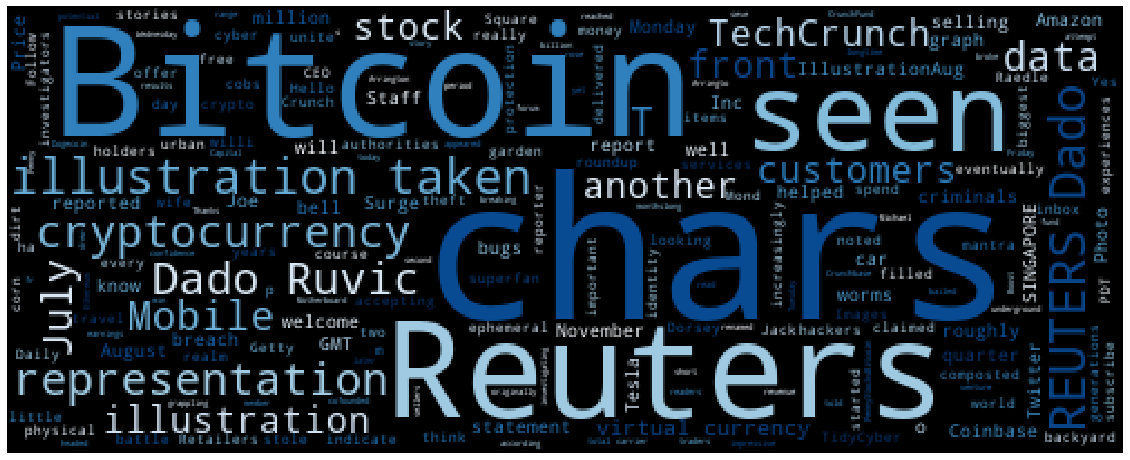

In [44]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wordcloud(btc.text.str.cat(),title="Bitcoin word cloud")

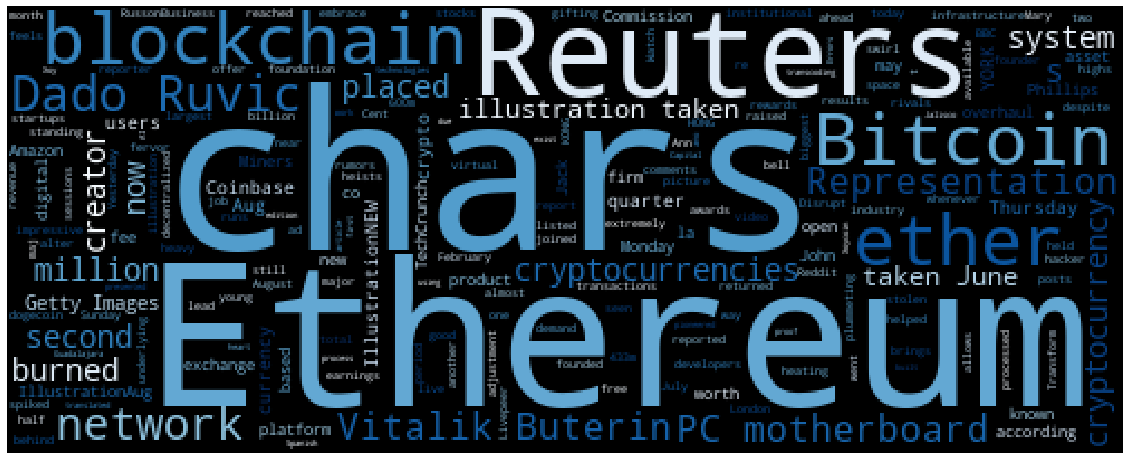

In [45]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(),title="Ethereum word cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [47]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc.text.str.cat()
all_btc_text

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe her

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"]="Bitcoin NER"

In [51]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [52]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label)

Joe Raedle/ 380
Twitter 386
Square 386
Jack Dorsey 380
Monday 391
Joe 380
every day 391
3 p.m. PDT 392
Daily Crunch 383
July 23, 2021 391
chars]T-Mobile 383
two years 391
roughly 49 million 397
Michael Arrington 380
TechCrunch 385
Crunchbase 383
CrunchFund 386
Tuesday 391
2017 391
today 391
Coinbase 380
its second quarter 391
the quarter 391
Coinbase 383
$2.23 billion 394
August 6, 2021 391
REUTERS 383
Dado Ruvic/IllustrationAug 380
20 397
Reuters 383
5.01 % 393
49,106.4 394
22:04 GMT 392
Friday 391
July 28 391
Reuters 383
40,000 394
Wednesday 391
20, 2021 391
PennyStocksBitcoin Price Surge Helped Boost 383
Bitcoin, Dogecoin 383
Ethereum 384
chars]T-Mobile 383
Motherboard 380
T-Mobile 383
Roughly 47.8 million 397
June 7, 2021 391
REUTERS 383
Edgar Su/IllustrationAug 380
Reuters 383
7.07% 393
47,587.38 394
2200 397
Martin/CNET
A 383
UK 384
Spain 384
Twitter 386
2020 391
the US Department of Justi 383
November 19, 2020 391
REUTERS 383
Dado Ruvic/IllustrationSINGAPORE 383
July 21 391
Reut

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth.text.str.cat() 
all_eth_text

"Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars]HONG KONG, Aug 5 (Reuters) - Ether held near two-month highs on Thursday ahead of a major adjustment to its underlying ethereum blockchain tha

In [62]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"]="Ethereum NER"

In [65]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [64]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label)

2017 391
Reddit 381
Ethereum 380
today 391
Coinbase 380
its second quarter 391
the quarter 391
Coinbase 383
$2.23 billion 394
Ethereum 380
February 3, 2018 391
REUTERS 383
Dado Ruvic 380
Aug 5 391
Reuters 383
Aug 5 391
Reuters 383
two-month 391
Thursday 391
Ethereum 380
June 29, 2021 391
REUTERS 383
Dado Ruvic/IllustrationAug 3 380
Reuters 383
Ethereum 380
Monday 391
Amazon 383
Amazon 383
chars]Vitalik Buterin 380
TechCrunch Disrupt London 2015 383
John Phillips 380
Vitalik Buterin 380
Mary-Ann RussonBusiness 380
BBC News 383
almost half 397
$600m 394
433 394
Yesterday 391
Ethereum 380
June 29, 2021 391
REUTERS 383
Dado Ruvic 380
July 30 391
Reuters 383
second 396
August 5 391
Sunday 391
over 45,799 397
second 396
Dado Ruvic 380
Reuters 383
More than $144 million 394
Livepeer 380
$20 million 394
Ethereum 380
Spanish 381
AI 383
Xoy Capital 380
Guadalajara 384
Jalisco 384
Xoycoin 380
Ethereum 380
Taylor 380
VanEck 383
Ethereum 380
the US Securities and Exchange Commission 383
Wednesday 3